In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn import svm
from sklearn import tree
from sklearn.preprocessing import scale
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
%matplotlib inline
data = pd.read_csv("adult.csv")

In [2]:
#Tamaño del conjunto de datos
data.shape  #tenemos 32561 filas y 15 columnas

(32561, 15)

In [3]:
data.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


## Para los valores perdidos utilizaremos la moda para reemplazarlos
Realizamos un conteo de los atributo

In [4]:
data.count()

age               32561
workclass         32561
fnlwgt            32561
education         32561
education.num     32561
marital.status    32561
occupation        32561
relationship      32561
race              32561
sex               32561
capital.gain      32561
capital.loss      32561
hours.per.week    32561
native.country    32561
income            32561
dtype: int64

In [78]:
np.var(data)

age               1.860557e+02
fnlwgt            1.114046e+10
education.num     6.618687e+00
capital.gain      5.454086e+07
capital.loss      1.623720e+05
hours.per.week    1.524543e+02
dtype: float64

# Limpieza de datos inmcopletos
- Calculamos la moda
- El valor de la moda se reemplaza los valores faltantes

In [5]:
data_temp=data
#Reemplazamos en workclass
workclass_moda=data_temp["workclass"].mode()[0]
print("La moda del atributo workclass es: ", workclass_moda)
data_temp.loc[data_temp["workclass"]=="?","workclass"] = "Private"
#Reemplazamos en occupation
occupation_moda=data_temp["occupation"].mode()[0]
print("La moda del atributo occupation es: ", occupation_moda)
data_temp.loc[data_temp["occupation"]=="?","occupation"] = "Prof-specialty"
#Reemplazamos en native.country
native_country_moda=data_temp["native.country"].mode()[0]
print("La moda del atributo native.country es: ", native_country_moda)
data_temp.loc[data_temp["native.country"]=="?","native.country"] = "United-States"
data_temp.head()

La moda del atributo workclass es:  Private
La moda del atributo occupation es:  Prof-specialty
La moda del atributo native.country es:  United-States


,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,Private,77053,HS-grad,9,Widowed,Prof-specialty,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,Private,186061,Some-college,10,Widowed,Prof-specialty,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [6]:
data_temp.shape

(32561, 15)

In [10]:
data_limpia=data_temp

Se reduce la categoria en el atributo marital.status, para un mejor modelo se va agrupar en solteros y casados, Married y Never-Married

In [11]:
#data["marital.status"].unique()

In [12]:
#data_limpia.loc[data_limpia["marital.status"]=="Widowed", "marital.status"]="Married"
#data_limpia.loc[data_limpia["marital.status"]=="Divorced","marital.status"]="Married"
#data_limpia.loc[data_limpia["marital.status"]=="Separated","marital.status"]="Married"
#data_limpia.loc[data_limpia["marital.status"]=="Married-civ-spouse","marital.status"]="Married"
#data_limpia.loc[data_limpia["marital.status"]=="Married-spouse-absent","marital.status"]="Married"
#data_limpia.loc[data_limpia["marital.status"]=="Married-AF-spouse","marital.status"]="Married"
#data_limpia.head()

In [13]:
#data_limpia["marital.status"].unique()

# Exploracion de datos
### Analizamos la clase income

In [14]:
#Mostramos la clase income
data_limpia["income"].value_counts()

<=50K    24720
>50K      7841
Name: income, dtype: int64

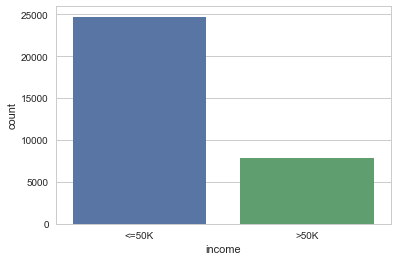

In [15]:
sns.countplot(x=data_limpia["income"] )
plt.show()

In [16]:
#Calculo de la media de income con los atributos numericos
data_limpia.groupby(data_limpia["income"]).mean()
#se observa que capital.gain y capital.loss tienen mucha diferencia, en menor medida la age(edad) y horas
#por semana (hours.per.week)

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
income,,,,,,
<=50K,36.783738,190340.86517,9.595065,148.752468,53.142921,38.840210
>50K,44.249841,188005.00000,11.611657,4006.142456,195.001530,45.473026


Calculamos los atributos categoricos, respecto a los numericos, se puede realizar uno por uno

In [17]:
data_limpia.groupby("workclass").mean()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
workclass,,,,,,
Federal-gov,42.590625,185221.243750,10.973958,833.232292,112.268750,41.379167
Local-gov,41.751075,188639.712852,11.042045,880.202580,109.854276,40.982800
Never-worked,20.571429,225989.571429,7.428571,0.000000,0.000000,28.428571
Private,37.109123,192446.206791,9.833361,868.081037,78.568156,39.642345
Self-emp-inc,46.017025,175981.344086,11.137097,4875.693548,155.138889,48.818100
Self-emp-not-inc,44.969697,175608.641480,10.226289,1886.061787,116.631641,44.421881
State-gov,39.436055,184136.613251,11.375963,701.699538,83.256549,39.031587
Without-pay,47.785714,174267.500000,9.071429,487.857143,0.000000,32.714286


In [18]:
data_limpia.groupby("education").mean()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
education,,,,,,
10th,37.429796,196832.465166,6.0,404.574491,56.845659,37.052519
11th,32.355745,194928.077447,7.0,215.097872,50.079149,33.925957
12th,32.000000,199097.508083,8.0,284.087760,32.337182,35.780600
1st-4th,46.142857,239303.000000,2.0,125.875000,48.327381,38.255952
5th-6th,42.885886,232448.333333,3.0,176.021021,68.252252,38.897898
7th-8th,48.445820,188079.171827,4.0,233.939628,65.668731,39.366873
9th,41.060311,202485.066148,5.0,342.089494,28.998054,38.044747
Assoc-acdm,37.381443,193424.093721,12.0,640.399250,93.418932,40.504217
Assoc-voc,38.553546,181936.016643,11.0,715.051375,72.754703,41.610709


In [19]:
data_limpia.groupby("marital.status").mean()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
marital.status,,,,,,
Divorced,43.041639,185802.790457,10.030385,728.414810,64.600720,41.246680
Married-AF-spouse,32.478261,188165.565217,10.173913,432.652174,0.000000,41.130435
Married-civ-spouse,43.247596,186763.172877,10.320646,1764.859509,122.439103,43.284856
Married-spouse-absent,40.578947,193141.760766,9.308612,653.983254,57.779904,39.669856
Never-married,28.150988,195383.308996,9.962464,376.588318,52.345502,36.939998
Separated,39.354146,206444.325854,9.293659,535.568780,58.110244,39.301463
Widowed,58.975831,174159.042296,9.093656,571.071501,79.666667,32.979859


In [20]:
data_limpia.groupby("occupation").mean()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
occupation,,,,,,
Adm-clerical,36.964456,192043.396286,10.113528,495.954907,60.794430,37.558355
Armed-Forces,30.222222,215425.888889,10.111111,0.000000,209.666667,40.666667
Craft-repair,39.031471,192132.599658,9.110759,649.512808,88.465235,42.304221
Exec-managerial,42.169208,184414.012543,11.449090,2262.772996,138.838416,44.987703
Farming-fishing,41.211268,170190.176056,8.608652,589.726358,63.075453,46.989940
Handlers-cleaners,32.165693,204391.006569,8.510219,257.572993,45.635766,37.947445
Machine-op-inspct,37.715285,195040.877622,8.487512,328.689311,61.706294,40.755744
Other-service,34.949621,188608.452200,8.779666,191.301669,38.250683,34.701669
Priv-house-serv,41.724832,201107.523490,7.362416,279.852349,21.449664,32.885906


In [21]:
data_limpia.groupby("relationship").mean()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
relationship,,,,,,
Husband,43.818616,187074.862503,10.326461,1795.062230,124.160919,44.120139
Not-in-family,38.346057,191131.795304,10.315593,743.327273,75.390728,40.595665
Other-relative,33.164118,205059.821611,8.786952,279.595311,51.332314,37.006116
Own-child,24.827940,193175.408840,9.486188,155.655485,39.511839,33.269337
Unmarried,40.293964,191128.405688,9.642194,455.031050,41.464887,39.103018
Wife,39.846301,181849.507653,10.463010,1659.791454,118.006378,36.861607


In [22]:
data_limpia.groupby("race").mean()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
race,,,,,,
Amer-Indian-Eskimo,37.173633,120831.147910,9.311897,625.266881,34.176849,40.048232
Asian-Pac-Islander,37.746872,159940.609240,10.960539,1478.358037,97.222329,40.127045
Black,37.767926,228013.124200,9.486236,609.940461,60.385083,38.422855
Other,33.457565,197124.191882,8.841328,934.660517,61.070111,39.468635
White,38.769881,187298.064280,10.135246,1121.660375,90.806155,40.689100


In [23]:
data_limpia.groupby("sex").mean()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
sex,,,,,,
Female,36.858230,185746.311206,10.035744,568.410547,61.187633,36.410361
Male,39.433547,191771.449013,10.102891,1329.370078,100.213309,42.428086


In [24]:
data_limpia.groupby("native.country").mean()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
native.country,,,,,,
Cambodia,37.789474,193080.368421,8.789474,1027.842105,183.052632,40.894737
Canada,42.545455,179852.933884,10.652893,1504.132231,129.933884,40.404959
China,42.533333,179047.986667,11.120000,366.480000,179.520000,37.786667
Columbia,39.711864,225149.406780,9.372881,180.610169,27.152542,39.067797
Cuba,45.768421,246291.347368,9.600000,367.231579,70.042105,39.157895
Dominican-Republic,37.728571,192089.557143,7.114286,1476.057143,25.171429,42.471429
Ecuador,36.642857,185858.821429,9.464286,527.607143,0.000000,39.571429
El-Salvador,34.132075,254392.971698,6.839623,574.320755,31.113208,36.792453
England,41.155556,182375.166667,11.011111,864.722222,82.755556,41.833333


In [25]:
#calculamos la autocorrelacion
data_limpia.corr()
#Sin considerar a income, solo los datos numericos
#Se observa que age, fnlwgt, education.num, capital.gain, capital.loss y hours.per.week tienen baja correlacion.

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
age,1.000000,-0.076646,0.036527,0.077674,0.057775,0.068756
fnlwgt,-0.076646,1.000000,-0.043195,0.000432,-0.010252,-0.018768
education.num,0.036527,-0.043195,1.000000,0.122630,0.079923,0.148123
capital.gain,0.077674,0.000432,0.122630,1.000000,-0.031615,0.078409
capital.loss,0.057775,-0.010252,0.079923,-0.031615,1.000000,0.054256
hours.per.week,0.068756,-0.018768,0.148123,0.078409,0.054256,1.000000


# Visualizaciones

Text(0,0.5,'Income')

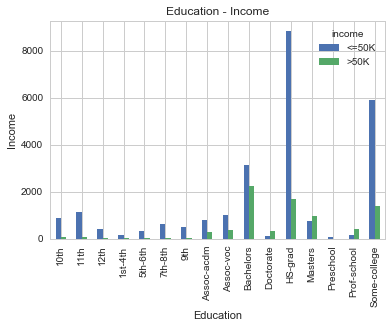

In [26]:
#Educacion vs income para ver cual afecta mas, al ser muy alta puede ser un buen predictor
pd.crosstab(data_limpia.education, data_limpia.income).plot(kind="bar")
plt.title("Education - Income")
plt.xlabel("Education")
plt.ylabel("Income")
                                                            

Text(0,0.5,'Income')

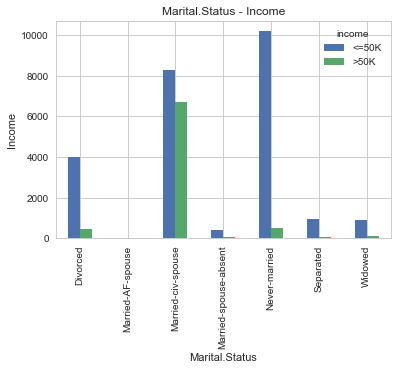

In [27]:
#Marital.statuts vs income para ver cual afecta mas
pd.crosstab(data_limpia["marital.status"] , data_limpia.income).plot(kind="bar")
plt.title("Marital.Status - Income")
plt.xlabel("Marital.Status")
plt.ylabel("Income")

Text(0,0.5,'Income')

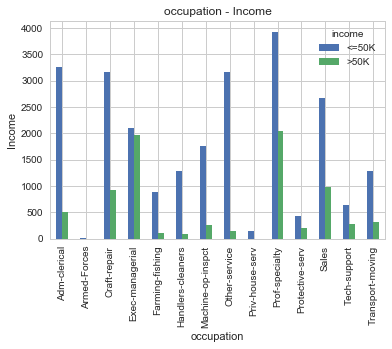

In [28]:
#Occupation vs income para ver cual afecta mas, al ser muy alta puede ser un buen predictor
pd.crosstab(data_limpia["occupation"] , data_limpia.income).plot(kind="bar")
plt.title("occupation - Income")
plt.xlabel("occupation")
plt.ylabel("Income")

Text(0,0.5,'Income')

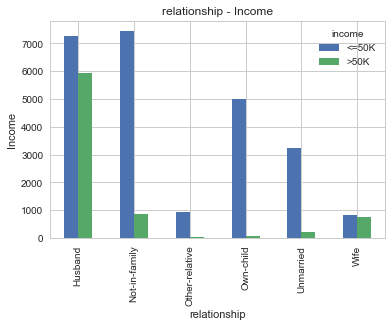

In [29]:
#relationship vs income para ver cual afecta mas, al ser muy alta puede ser un buen predictor
pd.crosstab(data_limpia["relationship"] , data_limpia.income).plot(kind="bar")
plt.title("relationship - Income")
plt.xlabel("relationship")
plt.ylabel("Income")

Text(0,0.5,'Income')

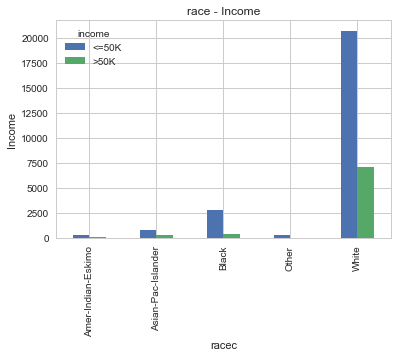

In [30]:
#race vs income para ver cual afecta mas
pd.crosstab(data_limpia["race"] , data_limpia.income).plot(kind="bar")
plt.title("race - Income")
plt.xlabel("racec")
plt.ylabel("Income")

Text(0,0.5,'Income')

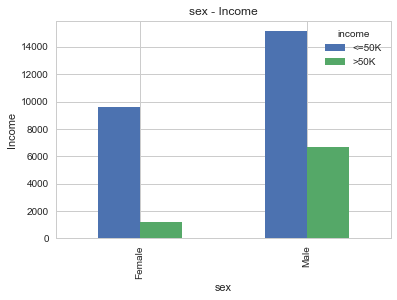

In [31]:
#sex vs income para ver cual afecta mas
pd.crosstab(data_limpia["sex"] , data_limpia.income).plot(kind="bar")
plt.title("sex - Income")
plt.xlabel("sex")
plt.ylabel("Income")

Text(0,0.5,'Income')

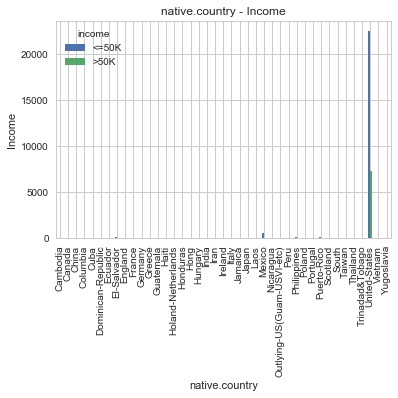

In [32]:
#Nativecountry vs income para ver cual afecta mas
pd.crosstab(data_limpia["native.country"] , data_limpia.income).plot(kind="bar")
plt.title("native.country - Income")
plt.xlabel("native.country")
plt.ylabel("Income")

## Nuevo dataset data_impia2 , sin las columnas duplicadas
income lo convierto en 0 para menores de 50 y 1 para mayores de 50

In [34]:
#Creo un nueveo dataset, no utilizo education-num, relationship, cappital.gain,capital.loss
data_limpia2=data_limpia[["age", "workclass", "fnlwgt", "education", "marital.status", "occupation", "race", "sex", "hours.per.week","native.country", "income" ]]
data_limpia2.head()

,age,workclass,fnlwgt,education,marital.status,occupation,race,sex,hours.per.week,native.country,income
0,90,Private,77053,HS-grad,Widowed,Prof-specialty,White,Female,40,United-States,<=50K
1,82,Private,132870,HS-grad,Widowed,Exec-managerial,White,Female,18,United-States,<=50K
2,66,Private,186061,Some-college,Widowed,Prof-specialty,Black,Female,40,United-States,<=50K
3,54,Private,140359,7th-8th,Divorced,Machine-op-inspct,White,Female,40,United-States,<=50K
4,41,Private,264663,Some-college,Separated,Prof-specialty,White,Female,40,United-States,<=50K


# Aplico dummy, a todos los atributos menos a income

In [35]:
data_x=data_limpia2[["age", "workclass", "fnlwgt", "education", "marital.status", "occupation", "race", "sex", "hours.per.week","native.country"]]
data_x_dum=pd.get_dummies(data_x)
data_x_dum.head()

,age,fnlwgt,hours.per.week,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,...,native.country_Portugal,native.country_Puerto-Rico,native.country_Scotland,native.country_South,native.country_Taiwan,native.country_Thailand,native.country_Trinadad&Tobago,native.country_United-States,native.country_Vietnam,native.country_Yugoslavia
0,90,77053,40,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,82,132870,18,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,66,186061,40,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,54,140359,40,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,41,264663,40,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


### Normalizo el nuevo dataset datalimpia2
-NOrmalizo a data_x_dum
- NOrmalizo el dummies

In [39]:
#data_norm=scale(data_limpia2[["age","fnlwgt","hours.per.week"]])
data_norm=scale(data_x_dum)
data_norm

array([[ 3.76961234, -1.06799736, -0.03542945, ...,  0.30720846,
        -0.04540836, -0.02217266],
       [ 3.18311167, -0.53916866, -1.81720429, ...,  0.30720846,
        -0.04540836, -0.02217266],
       [ 2.01011032, -0.03521956, -0.03542945, ...,  0.30720846,
        -0.04540836, -0.02217266],
       ..., 
       [ 0.10398314, -0.33543266, -0.03542945, ...,  0.30720846,
        -0.04540836, -0.02217266],
       [ 1.42360965, -0.35877741, -0.03542945, ...,  0.30720846,
        -0.04540836, -0.02217266],
       [-1.21564337,  0.11095988, -1.65522476, ...,  0.30720846,
        -0.04540836, -0.02217266]])

# Divido en Train y test

In [40]:
# para los valores de x utilizo data_x_dum  que es dummis aplicado a todos menos a income
# Loa valores de y es el atributo income convertido en 1 y 0
X=data_norm
y = 2 * (data_limpia2['income'] == '<=50K') - 1 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3, stratify=y)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)

print(y_test.shape)

(26048, 96)
(6513, 96)
(26048,)
(6513,)


In [41]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: income, dtype: int32

# Aplico modelo de Regresion Logistica

- Solo uso x_train y y_train
-Aplico dummies a X_train

### Aplico regresion logistica

In [42]:
logreg=LogisticRegression()
logreg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [43]:
y_pred=logreg.predict(X_test)
logreg.score(X_test,y_test)


0.82972516505450633

# Cross validation para regresion logistica
### Para evitar overfitting


Utilizando cross_val_score nos proporciona los resultados de la precisión que tuvo el modelo logreg en cada pliegue


In [44]:
precision = cross_val_score(logreg,X=X_train, y=y_train,cv=10, n_jobs=-1)

print('precisiones: {}'.format(precision))
print('Precision promedio: {0: .3f} +/- {1: .3f}'.format(np.mean(precision),
                                          np.std(precision)))

precisiones: [ 0.83307751  0.82693784  0.83346124  0.83838772  0.83877159  0.82757296
  0.83218126  0.85407066  0.81835637  0.82949309]
Precision promedio:  0.833 +/-  0.009


# Matriz de confusion Reg Logistica

In [45]:
matriz_confusion=metrics.confusion_matrix(y_test,y_pred)

In [46]:
matriz_confusion

array([[ 837,  731],
       [ 378, 4567]], dtype=int64)

## Calculo de la precision, recall, f-1 y support

In [47]:
print(classification_report(y_test,y_pred))

             precision    recall  f1-score   support

         -1       0.69      0.53      0.60      1568
          1       0.86      0.92      0.89      4945

avg / total       0.82      0.83      0.82      6513



# curva roc reg losgistica
Umabral a 0.5 u utilizando predict_proba

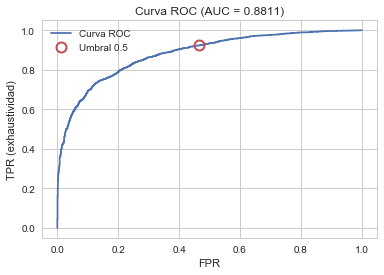

In [48]:
probabilidades_test = logreg.predict_proba(X_test)
predicciones_test = np.where(probabilidades_test[:,1] > 0.5, +1, -1) 
fpr, tpr, umbrales = metrics.roc_curve(y_test, probabilidades_test[:,1])
auc_roc = metrics.roc_auc_score(y_test, probabilidades_test[:,1])

plt.rcParams.update({'font.size': 9})
plt.plot(fpr, tpr, label= ("Curva ROC") )
plt.xlabel("FPR")
plt.ylabel("TPR (exhaustividad)")
plt.title(("Curva ROC (AUC = %.4f)" % auc_roc))
# ubicamos el punto más cercano a 0.5
umbral_05 = np.argmin(np.abs(umbrales - 0.5))
plt.plot(fpr[umbral_05], tpr[umbral_05], 'o', markersize=10,
         label="Umbral 0.5", fillstyle="none", c='r', mew=2)
plt.legend(loc='best', numpoints = 1)



# Aplicamos model SVM

In [49]:
modelo_svm = svm.SVC()
modelo_svm.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

Calculo el accuracy

In [50]:
y_pred_svm=modelo_svm.predict(X_test)
modelo_svm.score(X_test,y_test)

0.82803623522186398

### Matriz de confusion para SVM

In [51]:
matriz_confusion=metrics.confusion_matrix(y_test,y_pred_svm)
matriz_confusion

array([[ 807,  761],
       [ 359, 4586]], dtype=int64)

### Calculo de la precision, recall, f-1 y support para SVM

In [52]:
print(classification_report(y_test,y_pred_svm))

             precision    recall  f1-score   support

         -1       0.69      0.51      0.59      1568
          1       0.86      0.93      0.89      4945

avg / total       0.82      0.83      0.82      6513



# Aplico KNN

In [55]:
#Modelo knn con 3 vecino
modelo_knn = KNeighborsClassifier(n_neighbors=3)
#Aplico el modelo
modelo_knn.fit(X_train, y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

Calculo el accuracy

In [56]:
y_pred_knn=modelo_knn.predict(X_test)
modelo_knn.score(X_test,y_test)

0.80009212344541691

### Matriz de confusion para knn

In [57]:
matriz_confusion=metrics.confusion_matrix(y_test,y_pred_knn)
matriz_confusion

array([[ 880,  688],
       [ 614, 4331]], dtype=int64)

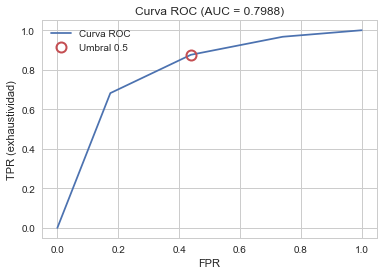

In [62]:
probabilidades_test = modelo_knn.predict_proba(X_test)
predicciones_test = np.where(probabilidades_test[:,1] > 0.5, +1, -1) 
fpr, tpr, umbrales = metrics.roc_curve(y_test, probabilidades_test[:,1])
auc_roc = metrics.roc_auc_score(y_test, probabilidades_test[:,1])

plt.rcParams.update({'font.size': 9})
plt.plot(fpr, tpr, label= ("Curva ROC") )
plt.xlabel("FPR")
plt.ylabel("TPR (exhaustividad)")
plt.title(("Curva ROC (AUC = %.4f)" % auc_roc))
# ubicamos el punto más cercano a 0.5
umbral_05 = np.argmin(np.abs(umbrales - 0.5))
plt.plot(fpr[umbral_05], tpr[umbral_05], 'o', markersize=10,
         label="Umbral 0.5", fillstyle="none", c='r', mew=2)
plt.legend(loc='best', numpoints = 1)

# Aplica Arboles de clasificacion

In [68]:
#Modelo arboles de clasificacion
#Si dejo que use toda la profunidad alcanza un accuraci de 1
#Si le añado profunidad con max_depth=4 , hace 0.79, similar al paper
modelo_tree=tree.DecisionTreeClassifier(max_depth=4)
#APlico el modelo
modelo_tree.fit(X_test,y_test)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

Calculo el accuracy

In [69]:
y_pred_tree=modelo_tree.predict(X_test)
modelo_tree.score(X_test,y_test)

0.8129894058037771

In [70]:
#matriz de confusion en arboles de clasificacion
matriz_confusion=metrics.confusion_matrix(y_test,y_pred_tree)
matriz_confusion

array([[ 605,  963],
       [ 255, 4690]], dtype=int64)

### ROC para arboles

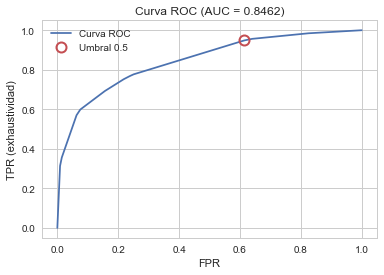

In [71]:
probabilidades_test = modelo_tree.predict_proba(X_test)
predicciones_test = np.where(probabilidades_test[:,1] > 0.5, +1, -1) 
fpr, tpr, umbrales = metrics.roc_curve(y_test, probabilidades_test[:,1])
auc_roc = metrics.roc_auc_score(y_test, probabilidades_test[:,1])

plt.rcParams.update({'font.size': 9})
plt.plot(fpr, tpr, label= ("Curva ROC") )
plt.xlabel("FPR")
plt.ylabel("TPR (exhaustividad)")
plt.title(("Curva ROC (AUC = %.4f)" % auc_roc))
# ubicamos el punto más cercano a 0.5
umbral_05 = np.argmin(np.abs(umbrales - 0.5))
plt.plot(fpr[umbral_05], tpr[umbral_05], 'o', markersize=10,
         label="Umbral 0.5", fillstyle="none", c='r', mew=2)
plt.legend(loc='best', numpoints = 1)

### Cross validation para arboles de clasificacion
Para evitar overfitting

-NOTA: cuando dejo la profundidad maxima, cross validation baja a 0.75, cuando vario la profundidad, los valores
de crossvalidation son similares a los del arbol normal

In [63]:
precision = cross_val_score(modelo_tree,X=X_train, y=y_train,cv=10, n_jobs=-1)

print('precisiones: {}'.format(precision))
print('Precision promedio: {0: .3f} +/- {1: .3f}'.format(np.mean(precision),
                                          np.std(precision)))

precisiones: [ 0.81465848  0.79854183  0.81158864  0.80729367  0.81305182  0.8172043
  0.81336406  0.82142857  0.79800307  0.81144393]
Precision promedio:  0.811 +/-  0.007


# Aplico Extra tree classifier

In [72]:
#Modelo arboles de clasificacion
modelo_xtratree=tree.ExtraTreeClassifier(max_depth=6)
#APlico el modelo
modelo_xtratree.fit(X_test,y_test)

ExtraTreeClassifier(class_weight=None, criterion='gini', max_depth=6,
          max_features='auto', max_leaf_nodes=None,
          min_impurity_decrease=0.0, min_impurity_split=None,
          min_samples_leaf=1, min_samples_split=2,
          min_weight_fraction_leaf=0.0, random_state=None,
          splitter='random')

Caluclo accuracy

In [73]:
y_pred_xtree=modelo_xtratree.predict(X_test)
modelo_xtratree.score(X_test,y_test)

0.78688776293566709

### MAtriz confusion xtreecalsifier

In [74]:
matriz_confusion=metrics.confusion_matrix(y_test,y_pred_xtree)
matriz_confusion

array([[ 648,  920],
       [ 468, 4477]], dtype=int64)

### roc xtratreeclasiffier

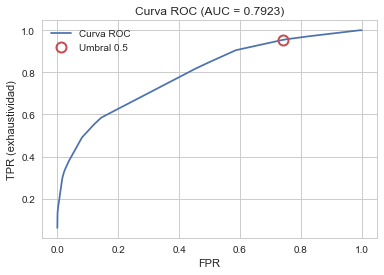

In [75]:
probabilidades_test = modelo_xtratree.predict_proba(X_test)
predicciones_test = np.where(probabilidades_test[:,1] > 0.5, +1, -1) 
fpr, tpr, umbrales = metrics.roc_curve(y_test, probabilidades_test[:,1])
auc_roc = metrics.roc_auc_score(y_test, probabilidades_test[:,1])

plt.rcParams.update({'font.size': 9})
plt.plot(fpr, tpr, label= ("Curva ROC") )
plt.xlabel("FPR")
plt.ylabel("TPR (exhaustividad)")
plt.title(("Curva ROC (AUC = %.4f)" % auc_roc))
# ubicamos el punto más cercano a 0.5
umbral_05 = np.argmin(np.abs(umbrales - 0.5))
plt.plot(fpr[umbral_05], tpr[umbral_05], 'o', markersize=10,
         label="Umbral 0.5", fillstyle="none", c='r', mew=2)
plt.legend(loc='best', numpoints = 1)

### Cross validation para extra tree classifier

In [76]:
precision = cross_val_score(modelo_xtratree,X=X_train, y=y_train,cv=10, n_jobs=-1)

print('precisiones: {}'.format(precision))
print('Precision promedio: {0: .3f} +/- {1: .3f}'.format(np.mean(precision),
                                          np.std(precision)))

precisiones: [ 0.79393707  0.78933231  0.78971604  0.76353167  0.76660269  0.78302611
  0.79953917  0.80414747  0.77764977  0.78110599]
Precision promedio:  0.785 +/-  0.013


# ENSAMBLE
Mis modelos son:  logreg, modelo_svm, modelo_knn, modelo_tree y modelo_xtratree


In [77]:
pred_base_train = pd.concat([pd.DataFrame(logreg.predict(X_train)),
                             pd.DataFrame(modelo_svm.predict(X_train)),
                             pd.DataFrame(modelo_knn.predict(X_train)),
                             pd.DataFrame(modelo_tree.predict(X_train))], 
                         axis=1)
pred_base_train.head()

,0,0,0,0
0,1,1,1,1
1,-1,-1,-1,1
2,1,1,1,1
3,1,1,1,1
4,1,1,1,1


In [79]:
#c=1/alfa
mejor_score = 0
mejor_C = None

for C in np.logspace(-2,4,13):  # ~ [0.01, 0.03, 0.1, ..., 10000] 
    modelo_ensamble = LogisticRegression(penalty='l2', C=C, random_state=0)
    scores_val = cross_val_score(modelo_ensamble, pred_base_train, y_train, cv=10)
    score_val_medio = np.mean(scores_val)  # Obtener la exactitud media de la validación cruzada en cada fold
    if score_val_medio > mejor_score: 
        mejor_score = score_val_medio
        mejor_C = C

modelo_ensamble = LogisticRegression(penalty='l2', C=mejor_C, random_state=0)
modelo_ensamble.fit(pred_base_train, y_train)

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [80]:
#calculo el accuracy

pred_base_test = pd.concat([pd.DataFrame(logreg.predict(X_test)),
                             pd.DataFrame(modelo_svm.predict(X_test)),
                             pd.DataFrame(modelo_knn.predict(X_test)),
                             pd.DataFrame(modelo_tree.predict(X_test))], 
                         axis=1)

In [81]:
modelo_ensamble.score(pred_base_test, y_test)

0.80009212344541691